# The **CRISP-DM** framework consists of **six key phases** that guide the data science workflow:

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**

This structured approach ensures a thorough and systematic process from **understanding the business problem** to **delivering actionable insights**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Settings: To show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 92)

In [3]:
df_listings = pd.read_csv('./BostonAirbnbData/listings.csv')

# 1. Business Understanding: Define Your Questions

* **Q.1 Demand:** Which neighborhoods have the highest and lowest demand based on availability and reviews?
* **Q.2 Performance:** What characteristics do top-rated listings share?
* **Q.3 Pricing:** What factors influence the price of an Airbnb listing in Boston?


# 2. Data Understanding: Explore the Dataset
Inspect missing values, data types, and distributions.

In [4]:
# Information about the number of rows and columns.

print(f"Rows: {df_listings.shape[0]} Columns: {df_listings.shape[1]}")

Rows: 3585 Columns: 95


In [5]:
# The number of the data types in the dataset

df_listings.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [6]:
# The name of the columns which are object data type

df_listings.dtypes[df_listings.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_respon

In [7]:
# The columns which are float64 data type

df_listings.dtypes[df_listings.dtypes=='float64']

neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object

In [8]:
# The name of the columns which are int64 data type

df_listings.dtypes[df_listings.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [9]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### Findings:
1. Drop columns where more than 75% column is null
2. Fill null rows with median (beds, bedrooms, bathrooms)
3. Clean and Change datatypes (host_response_rate, host_acceptance_rate, price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people)
4. Check the categorical columns
5. Handle with city, property_type, neighbourhood00)

# 3. Data Preparation: Clean and Process Data

## 3.1 Drop columns where more than 75% column is null

In [10]:
df_listings = df_listings.drop(columns = df_listings.columns[df_listings.isna().mean() > 0.75])

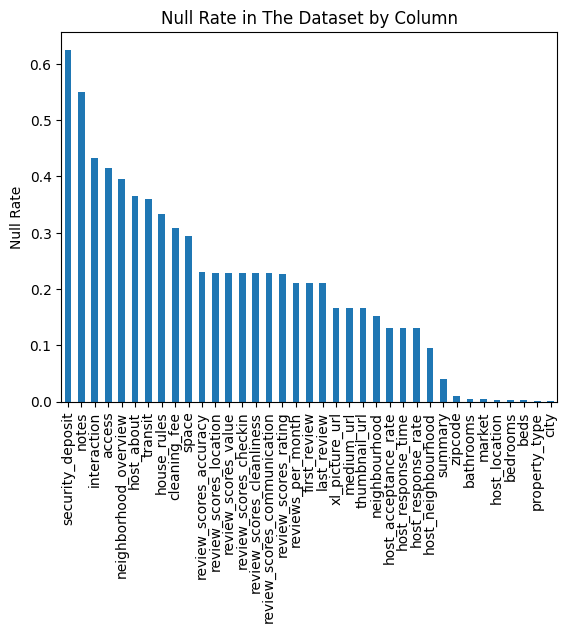

In [11]:
null_columns = (df_listings.isnull().sum()[df_listings.isnull().sum() > 0] / df_listings.shape[0]).sort_values(ascending=False)
null_columns.plot(kind='bar', legend=None);
plt.title('Null Rate in The Dataset by Column');
plt.ylabel('Null Rate')
plt.show()

## 3.2 Fill the null values with median

In [12]:
df_listings['beds'].describe()

count    3576.000000
mean        1.609060
std         1.011745
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: beds, dtype: float64

In [13]:
average_beds = df_listings['beds'].median()
df_listings['beds'] = df_listings['beds'].fillna(average_beds)

In [14]:
df_listings['bedrooms'].describe()

count    3575.000000
mean        1.255944
std         0.753060
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64

In [15]:
average_bedrooms = df_listings['bedrooms'].median()
df_listings['bedrooms'] = df_listings['bedrooms'].fillna(average_bedrooms)

In [16]:
df_listings['bathrooms'].describe()

count    3571.000000
mean        1.221647
std         0.501487
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: bathrooms, dtype: float64

In [17]:
average_bathrooms = df_listings['bathrooms'].median()
df_listings['bathrooms'] = df_listings['bathrooms'].fillna(average_bathrooms)

## 3.3 Clean and Change datatypes (host_response_rate, host_acceptance_rate, price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people)

In [18]:
# change columns type to string
df_listings['host_response_rate'] = df_listings['host_response_rate'].astype(str)
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].astype(str)

# remove "%"
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.rstrip('%')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.rstrip('%')

# change to numeric
df_listings['host_response_rate'] = pd.to_numeric(df_listings['host_response_rate'], errors='coerce')
df_listings['host_acceptance_rate'] = pd.to_numeric(df_listings['host_acceptance_rate'], errors='coerce')

# fill nan values with 0
df_listings['host_response_rate'].fillna(0, inplace=True)
df_listings['host_acceptance_rate'].fillna(0, inplace=True)

# change data type to int64
df_listings['host_response_rate'] = df_listings['host_response_rate'].astype('int64')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].astype('int64')

In [19]:
# create a list for price columns
price_columns = ['price',  'security_deposit', 'cleaning_fee', 'extra_people']

for col in price_columns:
    df_listings[col] = (
        df_listings[col]
        .astype(str)            
        .str.replace('$', '', regex=False) 
        .str.replace(',', '', regex=False) 
        .replace('', np.nan)    
        .apply(pd.to_numeric, errors='coerce') 
    )

# fill nan values with 0
df_listings[price_columns] = df_listings[price_columns].fillna(0)

# change data type to int64
for col in price_columns:
    df_listings[col] = df_listings[col].astype('int64')


In [20]:
# The name of the columns which are int64 data type

df_listings.dtypes[df_listings.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_response_rate                int64
host_acceptance_rate              int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
price                             int64
security_deposit                  int64
cleaning_fee                      int64
guests_included                   int64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

## 3.4 Handle with categorical columns

In [21]:
# How many categorical column do we have?
columns_with_comma = [col for col in df_listings.columns if df_listings[col].astype(str).str.contains(r'\,').any()]
columns_with_comma

['name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_name',
 'host_location',
 'host_about',
 'host_verifications',
 'street',
 'city',
 'smart_location',
 'amenities']

In [22]:
# Undertand the each categorical column what they have in their columns

for i in columns_with_comma:
    x = df_listings[i]
    print("listing:" + i)
    print(x)

listing:name
0                          Sunny Bungalow in the City
1                   Charming room in pet friendly apt
2                    Mexican Folk Art Haven in Boston
3       Spacious Sunny Bedroom Suite in Historic Home
4                                 Come Home to Boston
                            ...                      
3580                             Big cozy room near T
3581              BU Apartment DexterPark Bright room
3582                         Gorgeous funky apartment
3583            Great Location; Train and Restaurants
3584               (K1) Private Room near Harvard/MIT
Name: name, Length: 3585, dtype: object
listing:summary
0       Cozy, sunny, family home.  Master bedroom high...
1       Charming and quiet room in a second floor 1910...
2       Come stay with a friendly, middle-aged guy in ...
3       Come experience the comforts of home away from...
4       My comfy, clean and relaxing home is one block...
                              ...              

**Note:** It contains more than one category in *amenities* and *host_verifications*. Others are general sentence usage.
> These factors can influence the price of property.

## 3.5 Handle with city, property_type, neighbourhood

In [23]:
# Filter out NaN (empty) values ​​in column 'city'
city_null_rows = df_listings['city'].isnull().value_counts()
city_null_rows

False    3583
True        2
Name: city, dtype: int64

**Note:** There are only 2 row has no value in "city" column. Therefore, i can remove these columns and it wil not 

In [24]:
# Drop them from our dataset
df_listings = df_listings.dropna(subset=['city'])

In [25]:
# Filter out NaN (empty) values ​​in column 'property_type'
property_type_null_rows = df_listings['property_type'].isnull().value_counts()
property_type_null_rows

False    3580
True        3
Name: property_type, dtype: int64

**Note:** There are only 3 row has no value in "property_type" column. Therefore, i can replace these null values with the most repated value.

In [26]:
# Find the most repeated value in 'property_type' column
most_frequent_property_type = df_listings['property_type'].mode()[0]

# Replace NaN values in 'property_type' with the most repeated value
df_listings['property_type'] = df_listings['property_type'].fillna(most_frequent_property_type)

**Note:** I think *"neighbourhood_cleansed"* is already a cleaned version of *"Neighbourhood*". So keep: neighbourhood_cleansed drop: neighbourhood

In [27]:
df_listings = df_listings.drop('neighbourhood', axis=1)

# 4. Modelling:
1. Create dummy variables for 'property_type', 'room_type', 'bed_type','cancellation_policy'
2. Handling host_response_time
3. Create column for Count of amenities
4. Handling colums which are include "t" and "f". Change the 1 - 0

## 4.1 Create a dummy variables

In [28]:
#create dummy variables
categorical_features = ['property_type', 'room_type', 'bed_type','cancellation_policy']
for feature in categorical_features:
    df_listings = pd.concat([df_listings, pd.get_dummies(df_listings[feature])], axis=1)
df_listings = df_listings.drop(columns =categorical_features)

## 4.2 Handling with host_response_time

In [29]:
# What we have in this column
df_listings.groupby('host_response_time')['host_response_time'].count()

host_response_time
a few days or more      43
within a day           469
within a few hours    1218
within an hour        1382
Name: host_response_time, dtype: int64

In [30]:
# Create numeratic values depend on response time. 
def response_time_cat(x):
    if x == 'within an hour' or x == 'within a few hours':
        return 1
    elif x == 'within a day':
        return 0.5
    return 0

df_listings['host_response_time'] = df_listings['host_response_time'].apply(response_time_cat)

## 4.3 Create count of amenities column

In [31]:
df_listings['amenities_count'] = df_listings['amenities'].apply(lambda x: len(x.strip('{}').split(',')))

## 4.4 Handling with columns which are include "t" and "f"

In [32]:
# If "t" -> 1, if "f" -> 0 else "NaN"
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    df_listings[tf_feature] = df_listings[tf_feature].map(lambda s: 0 if s == "f" else (1 if s == "t" else np.nan))

# 5 Evaluation

## 5.1 Which neighborhoods have the highest and lowest demand based on availability and reviews?

### 5.1.1 Analysis

In [33]:
df_listings_neighborhoods = df_listings.dropna(subset=['review_scores_rating'])

In [34]:
# number_of_reviews	first_review	last_review	review_scores_rating	review_scores_accuracy	review_scores_cleanliness	review_scores_checkin	
# review_scores_communication	review_scores_location	review_scores_value	

In [35]:
df_listings_neighborhoods[['neighbourhood_cleansed', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_rating', 'number_of_reviews']].isnull().sum()

neighbourhood_cleansed    0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
review_scores_rating      0
number_of_reviews         0
dtype: int64

In [36]:
# Group by neighborhood
neighborhood_data = df_listings_neighborhoods.groupby('neighbourhood_cleansed').agg({
    'availability_30': 'mean',
    'availability_60': 'mean',
    'availability_90': 'mean',
    'availability_365': 'mean',
    'number_of_reviews': 'sum',
    'review_scores_rating': 'mean'
}).reset_index()

In [37]:
# Normalize features
scaler = MinMaxScaler()
cols_to_scale = ['availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating']
neighborhood_data[cols_to_scale] = scaler.fit_transform(neighborhood_data[cols_to_scale])

In [38]:
# Calculate demand score with weights
neighborhood_data['demand_score'] = (
    0.2 * (1 - neighborhood_data['availability_30']) +
    0.1 * (1 - neighborhood_data['availability_60']) +
    0.1 * (1 - neighborhood_data['availability_90']) +
    0.1 * (1 - neighborhood_data['availability_365']) +
    0.2 * neighborhood_data['number_of_reviews'] +
    0.3 * neighborhood_data['review_scores_rating']
)

In [39]:
# Sort neighborhoods by demand score
neighborhood_data_sorted = neighborhood_data.sort_values(by='demand_score', ascending=False)

In [40]:
# Display the neighborhoods with the highest and lowest demand
highest_demand = neighborhood_data_sorted.head(10)
lowest_demand = neighborhood_data_sorted.tail(10)

In [41]:
print("Neighborhoods with the highest demand:")
print(highest_demand[['neighbourhood_cleansed', 'demand_score', 'review_scores_rating']])

print("\nNeighborhoods with the lowest demand:")
print(lowest_demand[['neighbourhood_cleansed', 'demand_score', 'review_scores_rating']])

Neighborhoods with the highest demand:
   neighbourhood_cleansed  demand_score  review_scores_rating
12          Jamaica Plain      0.712837              0.607640
13       Leather District      0.668164              1.000000
14  Longwood Medical Area      0.664452              0.592663
17              North End      0.663293              0.566813
22              South End      0.635111              0.523566
3             Beacon Hill      0.631758              0.534261
0                 Allston      0.563716              0.232155
20           South Boston      0.531613              0.590820
5             Charlestown      0.514845              0.564216
16           Mission Hill      0.478180              0.000000

Neighborhoods with the lowest demand:
     neighbourhood_cleansed  demand_score  review_scores_rating
7                Dorchester      0.421416              0.148980
24             West Roxbury      0.396400              0.738213
19                  Roxbury      0.394702       

### 5.1.2 Visualization

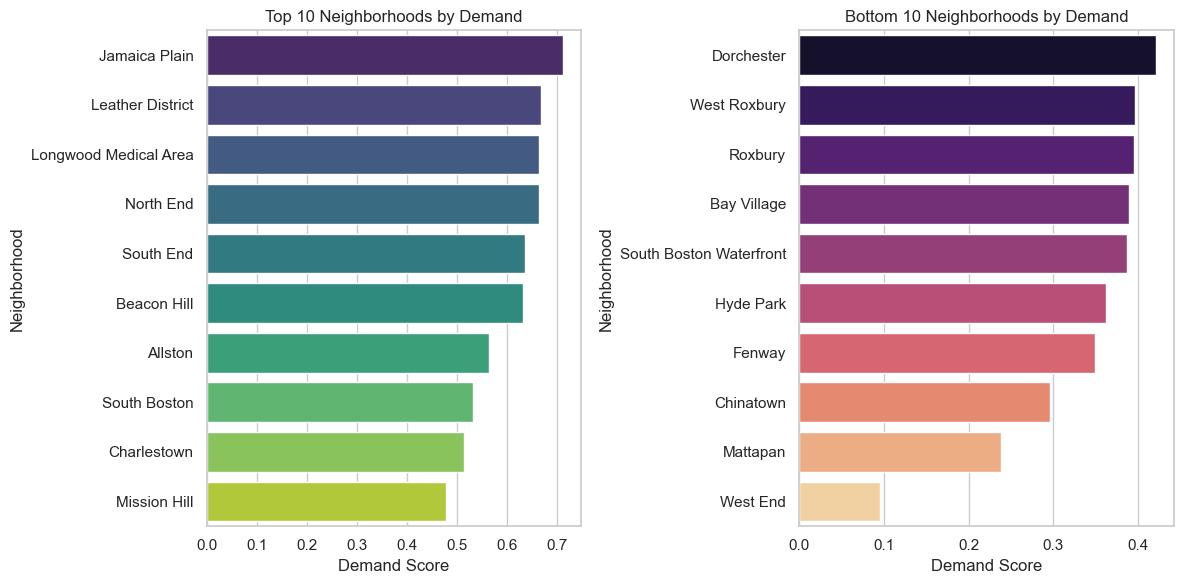

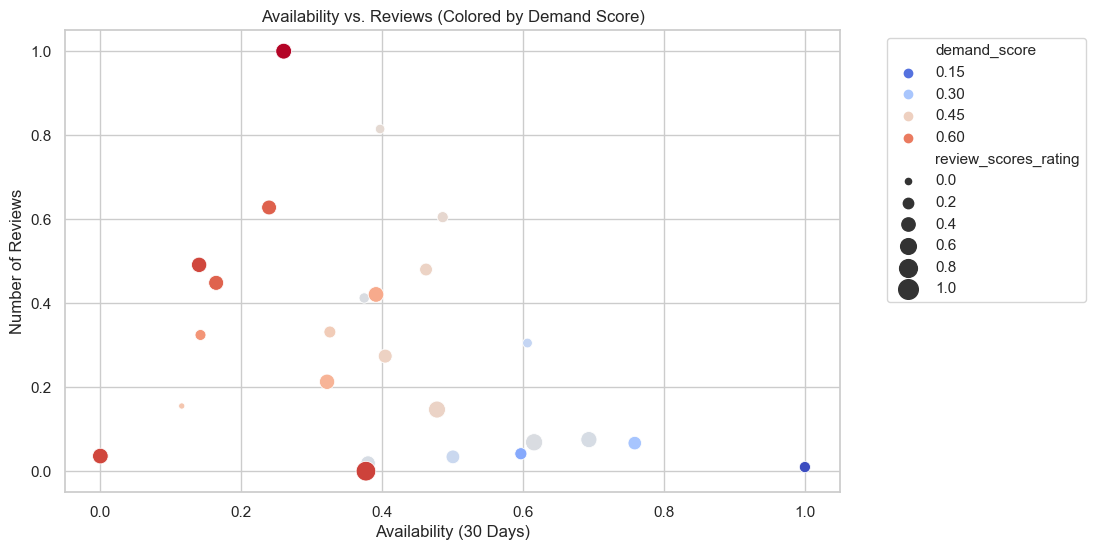

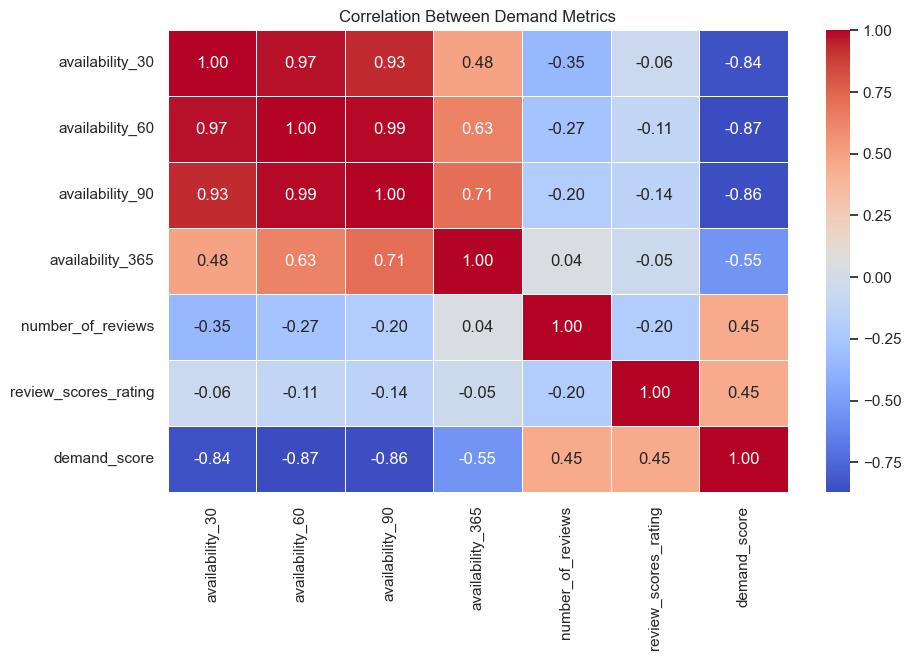

In [42]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# 1. Bar Plot for Top 10 and Bottom 10 Neighborhoods by Demand Score
plt.figure(figsize=(12, 6))

# Top 10 neighborhoods
plt.subplot(1, 2, 1)
sns.barplot(x='demand_score', y='neighbourhood_cleansed', data=highest_demand, palette="viridis")
plt.title('Top 10 Neighborhoods by Demand')
plt.xlabel('Demand Score')
plt.ylabel('Neighborhood')

# Bottom 10 neighborhoods
plt.subplot(1, 2, 2)
sns.barplot(x='demand_score', y='neighbourhood_cleansed', data=lowest_demand, palette="magma")
plt.title('Bottom 10 Neighborhoods by Demand')
plt.xlabel('Demand Score')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()

# 2. Scatter Plot: Availability vs. Reviews, Colored by Demand Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='availability_30', 
    y='number_of_reviews', 
    hue='demand_score', 
    size='review_scores_rating', 
    sizes=(20, 200), 
    data=neighborhood_data, 
    palette="coolwarm"
)
plt.title('Availability vs. Reviews (Colored by Demand Score)')
plt.xlabel('Availability (30 Days)')
plt.ylabel('Number of Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Heatmap: Correlation Between Demand Metrics
# Select relevant columns for correlation
correlation_data = neighborhood_data[['availability_30', 'availability_60', 'availability_90', 'availability_365', 
                                     'number_of_reviews', 'review_scores_rating', 'demand_score']]

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Demand Metrics')
plt.show()

### 5.1.3 Summary

1. Top Demand Areas: Jamaica Plain, Leather District, and Longwood Medical Area have the highest demand. Leather District has perfect review scores (1.000), but demand and review scores don’t always align (e.g., Mission Hill has high demand but 0.000 review score).
2. 
Low Demand Areas: West End, Mattapan, and Chinatown have the lowest demand, with West End being the least popular (demand score: 0.094885).**

Key Correlati**ons:

Strong negative link between availability (e.g., availability_30) and demand (-0.843972): high demand = low availability.

Moderate positive link between demand and review scores (0.451287): higher demand areas tend to have better reviews.

More reviews correlate with higher demand (0.**447737).

Key Insight**:
High-demand neighborhoods have limited availability and better reviews, while low-demand areas need improvements in quality or marketing to boost appeal.

## 5.2 What characteristics do top-rated listings share?

### 5.2.1 Analysis

In [43]:
df_performance = df_listings

In [44]:
# Define top-rated listings (e.g., ratings >= 95)
df_performance['is_top_rated'] = df_performance['review_scores_rating'] >= 90

In [45]:
# Compare top-rated listings with others
top_rated = df_performance[df_performance['is_top_rated'] == True]
other_listings = df_performance[df_performance['is_top_rated'] == False]

In [46]:
# Analyze key features
features_to_analyze = [
    'host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
    'price', 'accommodates', 'bedrooms', 'bathrooms', 'amenities_count',
    'number_of_reviews', 'reviews_per_month', 'availability_30', 'availability_60',
    'availability_90', 'availability_365'
]

In [47]:
# Compare means of features for top-rated vs other listings
comparison_results = []
for feature in features_to_analyze:
    top_rated_mean = top_rated[feature].mean()
    other_mean = other_listings[feature].mean()
    t_stat, p_value = ttest_ind(top_rated[feature], other_listings[feature])
    comparison_results.append({
        'feature': feature,
        'top_rated_mean': top_rated_mean,
        'other_mean': other_mean,
        'p_value': p_value
    })


In [48]:
# Convert results to a DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df

,feature,top_rated_mean,other_mean,p_value
0,host_is_superhost,0.188688,0.013055,1.193212e-62
1,host_response_rate,88.507070,74.456919,8.159550e-35
2,host_acceptance_rate,78.848854,65.402089,1.340640e-30
3,price,170.957582,178.033290,1.578568e-01
4,accommodates,3.061921,3.016319,4.478089e-01
5,bedrooms,1.267674,1.238903,2.574766e-01
6,bathrooms,1.215505,1.228133,4.552984e-01
7,amenities_count,16.619698,14.852480,9.755667e-28
8,number_of_reviews,24.200878,12.165144,6.318241e-24
9,reviews_per_month,2.072316,1.705387,NaN


In [49]:
comparison_df[comparison_df['p_value'] <0.05]

,feature,top_rated_mean,other_mean,p_value
0,host_is_superhost,0.188688,0.013055,1.193212e-62
1,host_response_rate,88.507070,74.456919,8.159550e-35
2,host_acceptance_rate,78.848854,65.402089,1.340640e-30
7,amenities_count,16.619698,14.852480,9.755667e-28
8,number_of_reviews,24.200878,12.165144,6.318241e-24
10,availability_30,7.167235,10.609008,7.699198e-23
11,availability_60,19.112628,25.427546,7.892943e-18
12,availability_90,35.202340,42.985640,3.040064e-12


### 5.2.2 Visualization

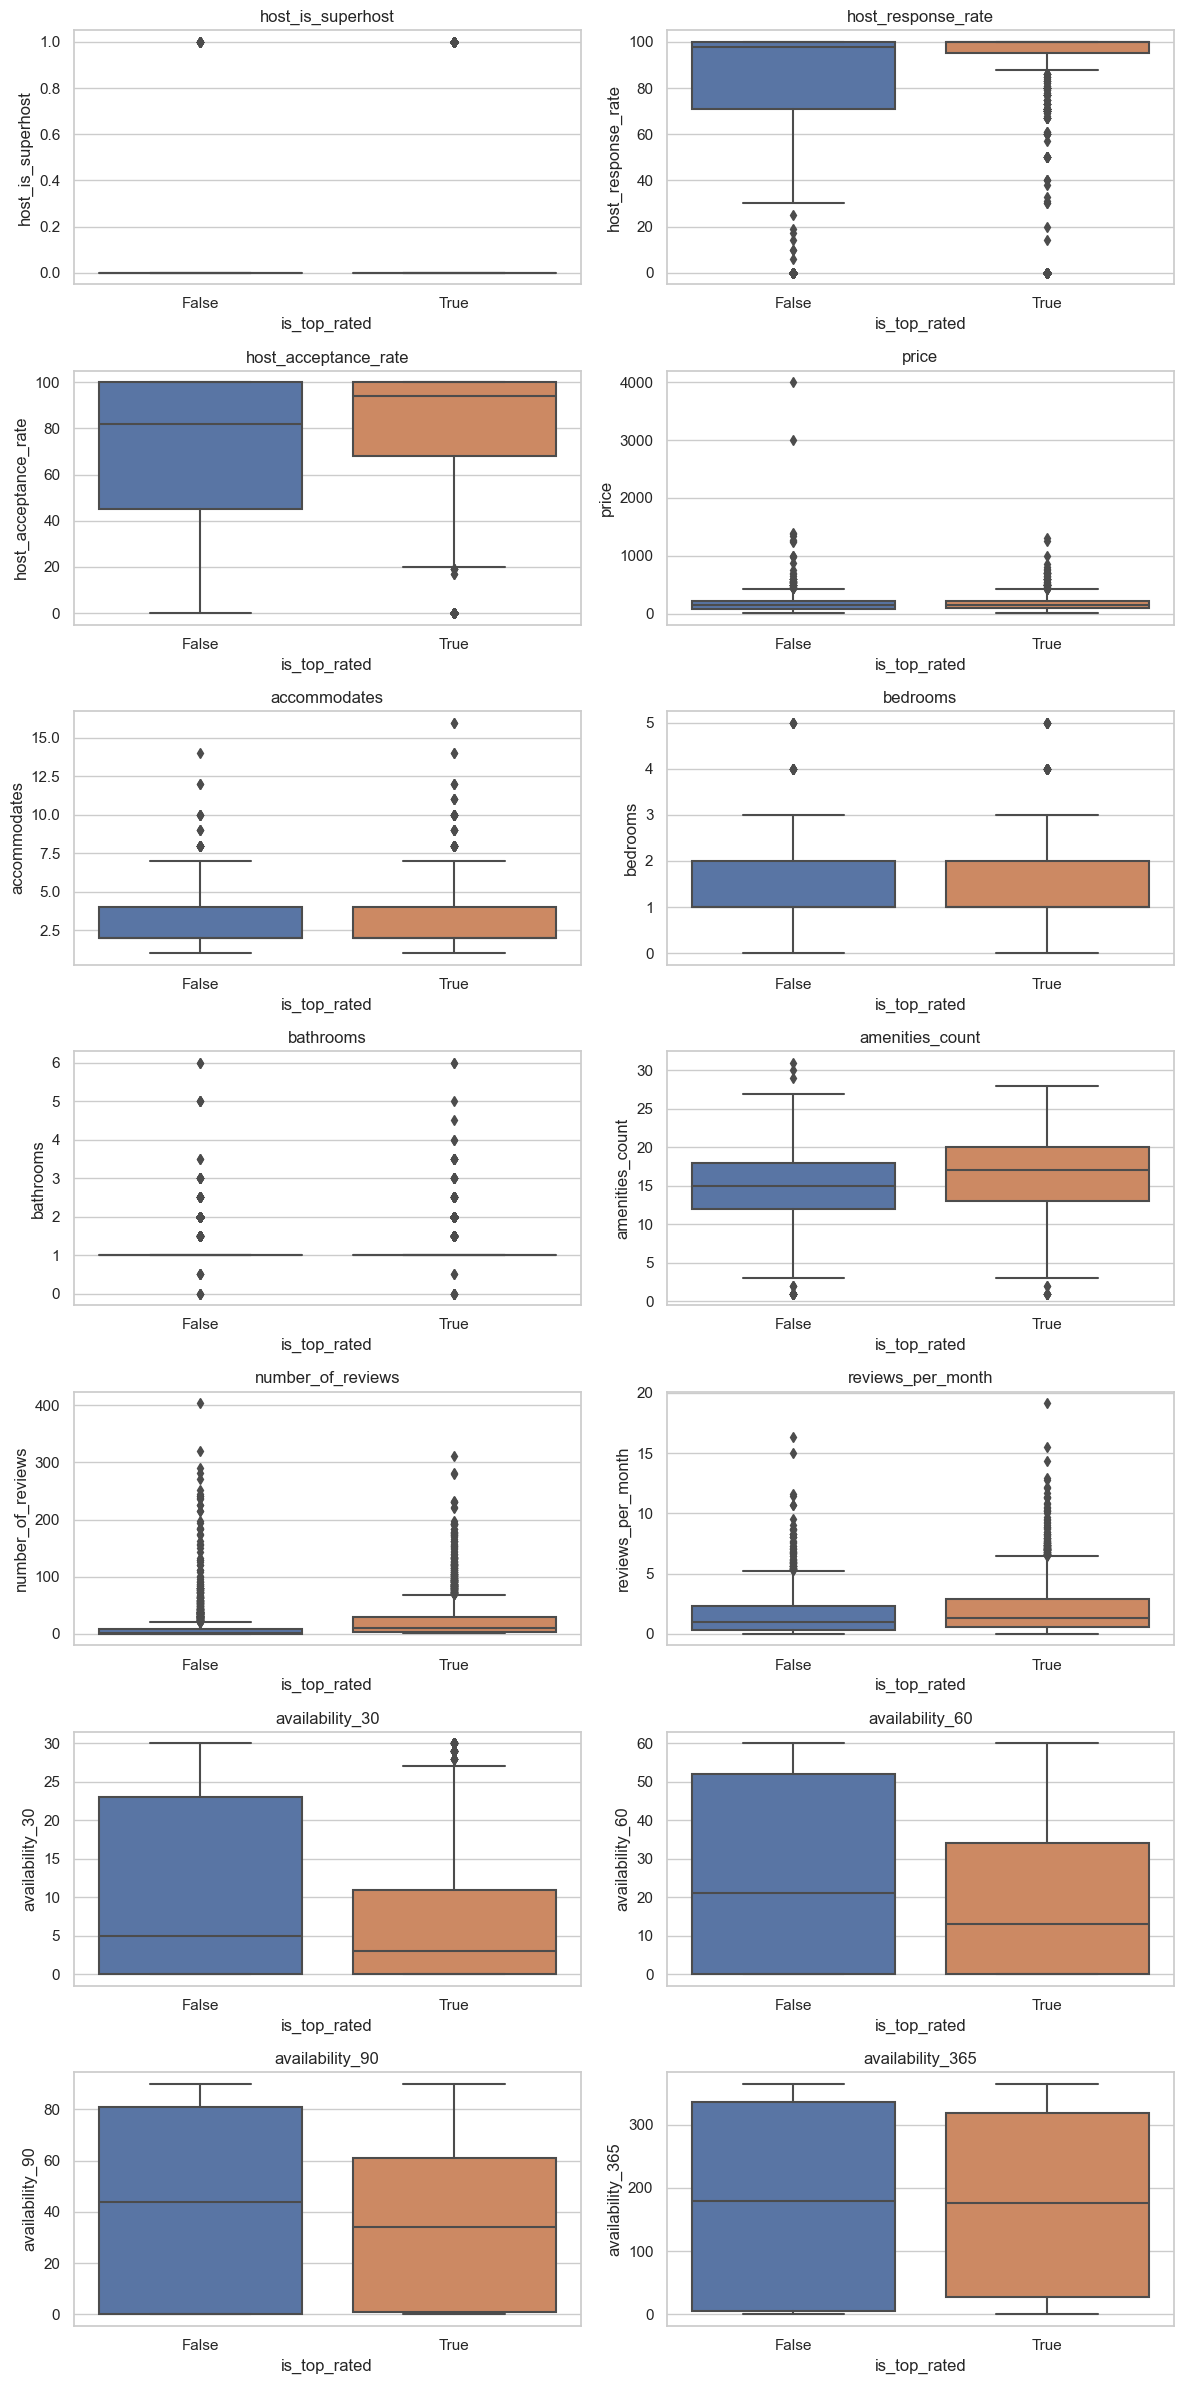

In [50]:
# Visualize differences
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 24))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(x='is_top_rated', y=feature, data=df_listings)
    plt.title(feature)
plt.tight_layout()
plt.show()

### 5.2.3 Summary

#### Host Factors:

Superhosts: Top-rated listings are significantly more likely to have superhosts (18.9% vs. 1.3%, p-value ≈ 0).

Response & Acceptance Rates: Hosts of top-rated listings have higher response rates (88.5% vs. 74.5%) and acceptance rates (78.8% vs. 65.4%), indicating better host responsiveness and reliability. 

#### Listing Features:

Amenities: Top-rated listings offer more amenities (16.6 vs. 14.9, p-value ≈ 0), suggesting guests value additional comforts.

Price: No significant difference in price (p-value = 0.158), meaning top-rated listings aren’t necessarily more expensive.

Size (Bedrooms, Bathrooms, Accommodates): No significant differences, indicating size isn’t a key factor for top ratings.

#### Engagement & Availability:

Reviews: Top-rated listings have more reviews (24.2 vs. 12.2) and higher reviews per month (2.07 vs. 1.71), showing greater guest engagement.

Availability: Top-rated listings have lower short-term availability (e.g., availability_30: 7.2 vs. 10.6), suggesting they are booked more frequently.

#### Key Insight
Top-rated listings are characterized by superhosts, higher host responsiveness, more amenities, and greater guest engagement. Price and size don’t significantly impact ratings, but lower availability indicates higher demand.icates higher demand.icates higher demand.

## 5.3 What factors influence the price of an Airbnb listing in Boston?

### 5.3.1 Analysis

In [51]:
df_listings_for_modelling = df_listings.select_dtypes(exclude='object')

In [52]:
# Select relevant features
features = [
    'accommodates', 'amenities_count', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 
    'host_response_rate', 'host_acceptance_rate', 'number_of_reviews',
    'availability_30', 'availability_60', 'availability_90', 'availability_365', 'beds', 'price', 'number_of_reviews'
]

In [53]:
# Filter the dataset
df_listings_lr = df_listings_for_modelling.loc[df_listings['price']<426]

In [54]:
df_listings_lr.shape

(3467, 70)

<AxesSubplot:>

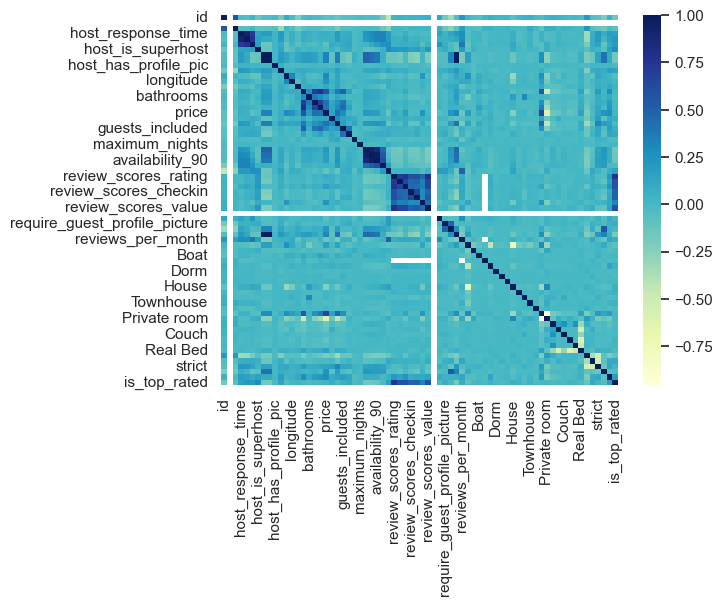

In [55]:
# Plotting correlation heatmap
dataplot = sns.heatmap(df_listings_lr.corr(), cmap="YlGnBu")
dataplot

In [56]:
correlations = df_listings_lr.corr()
target_column = 'price'
target_corr = correlations[target_column]
# Find columns that lie between -0.1 and 0.1 (low and high correlation)
low_corr_features = target_corr[(target_corr > -0.1) & (target_corr < 0.1)].index.tolist()
high_corr_features = target_corr[(target_corr > 0.8) & (target_corr < -0.8)].index.tolist()

# Dropt these columns
df_listings_lr = df_listings_lr.drop(columns=low_corr_features + high_corr_features)

In [57]:
df_listings_lr.shape

(3467, 37)

In [58]:
df_listings_lr.isnull().sum()

scrape_id                             0
host_listings_count                   0
host_total_listings_count             0
latitude                              0
longitude                             0
is_location_exact                     0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
price                                 0
security_deposit                      0
cleaning_fee                          0
guests_included                       0
availability_30                       0
availability_60                       0
availability_90                       0
number_of_reviews                     0
review_scores_rating                773
review_scores_cleanliness           778
review_scores_location              782
requires_license                      0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   719


In [59]:
df_listings_lr = df_listings_lr.dropna(subset=['review_scores_rating', 'review_scores_cleanliness', 'review_scores_location'])

In [60]:
df_listings_lr.isnull().sum()

scrape_id                           0
host_listings_count                 0
host_total_listings_count           0
latitude                            0
longitude                           0
is_location_exact                   0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
availability_30                     0
availability_60                     0
availability_90                     0
number_of_reviews                   0
review_scores_rating                0
review_scores_cleanliness           0
review_scores_location              0
requires_license                    0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Apartment                           0
House       

In [61]:
# Prepare data for modeling
X = df_listings_lr.drop(columns=['price'])
y = df_listings_lr['price' ]

In [62]:
# Add a constant to the independent variables (for statsmodels)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Fit a linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()


In [64]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.6901056807551389
Mean Squared Error: 2380.866778069572


### 5.3.2 Visualization

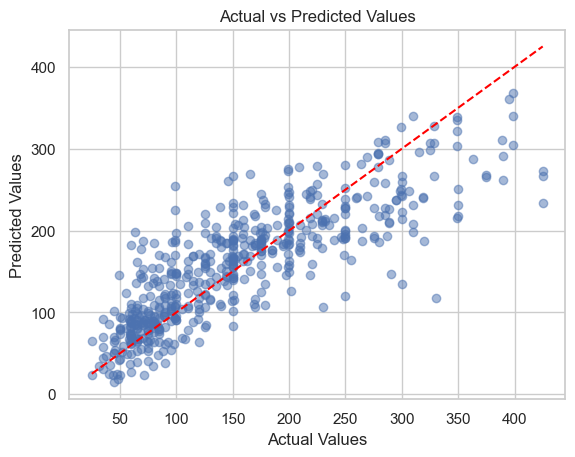

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

 Points close to the red diagonal line indicate good predictions. Deviations suggest errors.

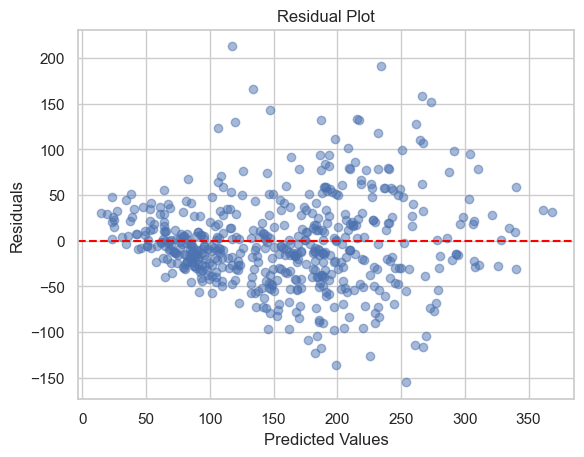

In [66]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Randomly scattered residuals around the red line indicate a good fit. Patterns (e.g., curves or funnels) suggest issues with the model.

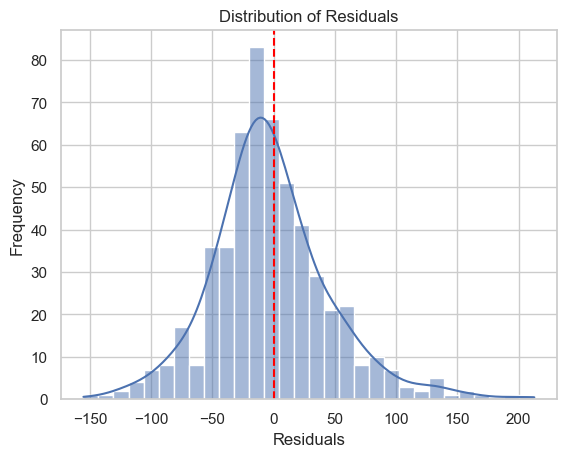

In [67]:
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='red', linestyle='--')  # Vertical line at 0
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

A bell-shaped curve centered at 0 indicates normally distributed residuals, which is ideal.

### 5.3.3 Summary

### Summary of Linear Regression Results:

1. **R² Score (0.690)**:  
   - The model explains **69% of the variance** in the target variable, which is a relatively strong performance. It indicates that the predictors in the model are reasonably good at capturing the trends in the data.

2. **Mean Squared Error (MSE = 2380.87)**:  
   - The MSE is relatively tthat the model's predictions have a significant amount of error. This could be due to outliers, non-linear relationships, or missing important predictors.

### Key Insights:
- The model performs **well in terms of explanatory power** (R² = 0.690), but the **high MSE** indicates room for improvement in prediction accuracy.
-  patterns.
  - **Handling In this work I didn't work on outliers. Outliers**: Investigating and addressing outliers that may be inflating the MSE.
  - **Exploring Non-LineIn this work only LR is used. ar Models**: If relationships are models like decision trees, random forests, or grad models can be consideredient boosting.

### Conclusion:
The model is **decent but not optimal**. While it explains a good portion of the variance, the high prediction errors suggest further refinement is needed for better accuracy.utliers.liers.ctors.

# 6 Deployment

1. **Create a Github repository** to share your code and data wrangling/modeling techniques, with a technical audience in mind
2. **Create a blog post** to share your questions and insights with a non-technical audience

#### Project Deliverables
There are two deliverables that are required for project completion.

A Github repository for your code.
A blog post of your findings.ngs.e